<a href="https://colab.research.google.com/github/trypuz/ai_dla_kazdego/blob/main/siec_neuronowa_dla_kazdego/siec_neuronowa_z_jedna_warstwa_ukryta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XOR

epoche 1
dokładność = 50.0%
epoche 2
dokładność = 50.0%
epoche 3
dokładność = 50.0%
epoche 4
dokładność = 50.0%
epoche 5
dokładność = 50.0%
epoche 6
dokładność = 50.0%
epoche 7
dokładność = 50.0%
epoche 8
dokładność = 50.0%
epoche 9
dokładność = 50.0%
epoche 10
dokładność = 50.0%


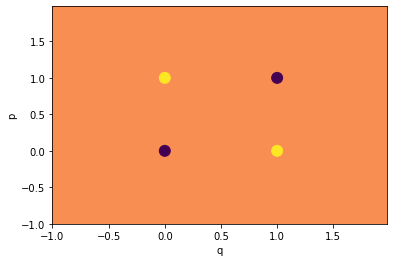

In [ ]:
X = [[1, 1, 0, 0],
     [1, 0, 1, 0]]
Y = [[0, 1, 1, 0]] 

X = np.array(X)
Y = np.array(Y)

d = perceptron_model(X, Y, iteration_number=10)
plot_decision_boundary(lambda x: predict(preactivation(d["w"], d["b"], x.T)), X, Y)

# Sieć z warstwą ukrytą

In [ ]:
import numpy as np
# XOR
X = [[1, 1, 0, 0],
     [1, 0, 1, 0]]
Y = [[0, 1, 1, 0]] 

X = np.array(X)
Y = np.array(Y)

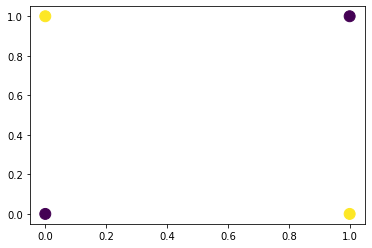

In [ ]:
import matplotlib.pyplot as plt
# Visualize the data:
plt.scatter(X[0, :], X[1, :], marker='o', c = Y.T, s=120);

In [ ]:
from random import random

def initialize_parameters(n_X, n_h, n_y):
  W1 = np.random.rand(n_h, n_X) * 0.01
  W2 = np.random.rand(n_y, n_h) * 0.01
  b1 = np.random.rand(n_h,1) * 0.01
  b2 = np.random.rand(n_y,1) * 0.01

  parameters = {'W1':W1,
                'W2':W2,
                'b1':b1,
                'b2':b2}

  assert(W1.shape == (n_h, n_X))
  assert(W2.shape == (n_y, n_h))
  assert(b1.shape == (n_h, 1))
  assert(b2.shape == (n_y, 1))

  return parameters


In [ ]:
n_X = X.shape[0]
n_y = Y.shape[0]
n_h = 4

In [ ]:
# parameters = initialize_parameters(n_X = n_X, n_h = n_h, n_y = n_y)

In [ ]:
# parameters['W1']

In [ ]:
# parameters['W2']

In [ ]:
# parameters['b1']

In [ ]:
# parameters['b2']

In [ ]:
# A0 = X
def preactivation(weights, bias, A):
  Z = np.dot(weights, A) + bias
  assert(Z.shape == (weights.shape[0], A.shape[1]))
  return Z

In [ ]:
# preactivation(weights = parameters['W1'], bias = parameters['b1'], A = X)

In [ ]:
def sigmoid(z):
  z = 1 / (1 + np.exp(-z))
  return z

In [ ]:
# sigmoid(0)

In [ ]:
# sigmoid(8)

In [ ]:
# sigmoid(np.array([0, 8]))

In [ ]:
def tanh(z):
  z = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
  return z

In [ ]:
# tanh(0)

In [ ]:
# tanh(8)

In [ ]:
# tanh(-2)

In [ ]:
def forward_propagation(X, parameters):
  # A0 = X
  Z1 = preactivation(weights = parameters['W1'], bias = parameters['b1'], A = X)
  A1 = tanh(Z1)
  Z2 = preactivation(weights = parameters['W2'], bias = parameters['b2'], A = A1)
  A2 = sigmoid(Z2)
  m = X.shape[1]
  assert(A2.shape == (1, m))

  cache = {'Z1':Z1,
           'Z2':Z2,
           'A1':A1,
           'A2':A2}

  return A2, cache

In [ ]:
# A2, cache = forward_propagation(X=X, parameters=parameters)
# print(A2)

In [ ]:
# def predict(X, parameters):
#   A2, _ = forward_propagation(X=X, parameters=parameters)
#   predictions = (A2 > 0.5)
#   return predictions * 1

In [ ]:
# predict(X=X, parameters=parameters)

$L(a,y)$

$a = sigmoid(z)$

$a$ - prawdopodobieństwo tego, że $y = 1$

- Jeśli $y=1$, to $P(y | x, w, b) = a$
- Jeśli $y=0$, to $P(y | x, w, b) = 1 - a$
- $y\in \{1,0\}$
- $P(y | x) = a^{y}(1-a)^{(1-y)}$
- Jeśli $y=1$, $P(y | x) = a^{1}(1-a)^{(1-1)} = a$
- Jeśli $y=0$, $P(y | x) = a^{0}(1-a)^{(1-0)} = 1- a$
- $log(P(y | x)) = log(a^{y}(1-a)^{(1-y)}) = log(a^{y}) + log((1-a)^{(1-y)}) = ylog(a) + (1-y)log(1-a)$ 
- $L(a,y) = - (ylog(a) + (1-y)log(1-a))$
- $log(P(y | x)) = - L(a,y)$
- Jeśli $y=1$, $L(a,y) = - log(a)$; aby strata była mała, $- log(a)$ był tak mały jak to możliwe; aby tak się stało, to a musi być tak duże jak to możliwe, czyli bliskie 1; czyli przy mininalnej stracie L, predykcja będzie bliska 1 i y też będzie 1
- Jeśli $y=0$, $L(a,y) = - log(1-a)$; aby strata była mała, $- log(1-a)$ był tak mały jak to możliwe; aby tak się stało, to 1 - a musi być tak duże jak to możliwe, czyli bliskie 1; a powinno być tak małe jak to możliwe, a więc bliskie 0; czyli przy mininalnej stracie L, predykcja będzie bliska 0 i y też będzie 0
- $m = 4$
- Funkcja kosztu $ J(w,b) = L(a^{(1)}, y^{(1)}) + ... + L(a^{(4)}, y^{(4)}) = \frac{1}{m}\sum\limits_{i = 1}^{m} L(a^{(i)}, y^{(i)})$



- $y = 2x$
- $P = (1,2)$
- $Q = (4,8)$
- $dx = 4 - 1 = 3 $
- $dy = 8 - 2 = 6 $
- współczynnik kierunkowy prostej $y = 2x$:
  - $\frac{dy}{dx} = \frac{6}{3} = 2$

- $P = (-5,-10)$
- $Q = (-1,-2)$
- $dx = -1 - (-5) = -1 + 5 = 4 $
- $dy = -2 - ( -10) = -2 + 10 = 8 $
- współczynnik kierunkowy prostej $y = 2x$:
  - $\frac{dy}{dx} = \frac{8}{4} = 2$


- $(0, 0.5)$, $(2,1)$
- $\frac{dy}{dx} = \frac{0.5}{2} = 0.25$


- historia jest taka:
  - $x_1, x_2, y$
  - $w_1, w_2, b$
  - $z = x_1w_1 + x_2w_2 +b$
  - $a = sigmoid(z)$
  - $L(a,y) = -(ylog(a) + (1-y)log(1-a))$
  - $\frac{d L(a,y)}{da} = - (\frac{y}{a} - \frac{1-y}{1 - a}) = - \frac{y}{a} + \frac{1-y}{1 - a}$
    - $\frac{d \log(a)}{da} = \frac{1}{a}$
    - $\frac{d \log(1-a)}{da} = - \frac{1}{1 - a}$
  - jeśli $y=1$, to $\frac{d L(a,y)}{da} = - \frac{1}{a}$


In [ ]:
def backward_propagation(parameters, cache, X, Y):
  m = X.shape[1]
  W1 = parameters['W1']
  W2 = parameters['W2']
  A1 = cache['A1'] # tanh
  A2 = cache['A2'] # sigmoid

  dZ2 = A2 - Y
  
  # informacja o ile zmienić W2 i b2
  dW2 = np.dot(dZ2, A1.T) / m
  db2 = np.sum(dZ2, axis=1, keepdims=True) / m
  
  # zmiań A2 na A1 !!!
  dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
  
  # informacja o ile zmienić W1 i b1
  dW1 = np.dot(dZ1, X.T) / m
  db1 = np.sum(dZ1, axis=1, keepdims=True) / m

  grads = {'dW1': dW1,
           'dW2': dW2,
           'db1': db1,
           'db2': db2}

  return grads

In [ ]:
# backward_propagation(parameters, cache, X, Y)

In [ ]:
def update(parameters, grads, learning_rate=1):
  W1 = parameters['W1']
  W2 = parameters['W2']
  b1 = parameters['b1']
  b2 = parameters['b2']

  dW1 = grads['dW1']
  dW2 = grads['dW2']
  db1 = grads['db1']
  db2 = grads['db2']

  W1 = W1 - learning_rate * dW1
  W2 = W2 - learning_rate * dW2
  b1 = b1 - learning_rate * db1  
  b2 = b2 - learning_rate * db2

  parameters = {'W1': W1,
                'W2': W2,
                'b1': b1,
                'b2': b2}

  return parameters

In [ ]:
# funkcja kosztu: (ang. binary cross entropy cost function)
def compute_cost(A2, Y):
  logs = np.multiply(Y, np.log(A2)) + np.multiply(1-Y, np.log(1-A2))
  m = Y.shape[1]
  cost = - np.sum(logs) / m
  return cost

In [ ]:
def model(X, Y, n_h, number_iterations, learning_rate=1):
  n_X = X.shape[0]
  n_y = Y.shape[0]
  
  parameters = initialize_parameters(n_X, n_h, n_y)

  for i in range(number_iterations):
    A2, cache = forward_propagation(X, parameters)
    if i % 1000 == 0:
      print(f'koszt: {compute_cost(A2, Y)}')
    grads = backward_propagation(parameters, cache, X, Y)
    parameters = update(parameters, grads, learning_rate=learning_rate)

  return parameters

In [ ]:
learned_parameters = model(X, Y, n_h=4, number_iterations=40000, learning_rate=1.2)

koszt: 0.6931531930741729
koszt: 0.693147180173326
koszt: 0.6931471801474206
koszt: 0.6931471801195598
koszt: 0.6931471800894937
koszt: 0.6931471800569327
koszt: 0.6931471800215385
koszt: 0.6931471799829132
koszt: 0.6931471799405865
koszt: 0.6931471798939975
koszt: 0.6931471798424733
koszt: 0.6931471797851992
koszt: 0.6931471797211803
koszt: 0.693147179649191
koszt: 0.693147179567705
koszt: 0.6931471794748012
koszt: 0.6931471793680318
koszt: 0.6931471792442377
koszt: 0.6931471790992801
koszt: 0.6931471789276504
koszt: 0.693147178721883
koszt: 0.6931471784716537
koszt: 0.6931471781623548
koszt: 0.6931471777727686
koszt: 0.6931471772711276
koszt: 0.6931471766081486
koszt: 0.6931471757040638
koszt: 0.6931471744229466
koszt: 0.6931471725178756
koszt: 0.6931471695019985
koszt: 0.6931471643047171
koszt: 0.6931471541811697
koszt: 0.6931471302332528
koszt: 0.693147048779048
koszt: 0.6931462953482492
koszt: 0.008372669805901484
koszt: 0.0014841164855321609
koszt: 0.0008046587232426052
koszt: 0.

In [ ]:
# learned_parameters

In [ ]:
def predict(parameters, X):
    
    A2, _ = forward_propagation(X, parameters)
    
    predictions = (A2 > 0.5)
    
    return predictions * 1

In [ ]:
predict(learned_parameters, X)

array([[0, 1, 1, 0]])

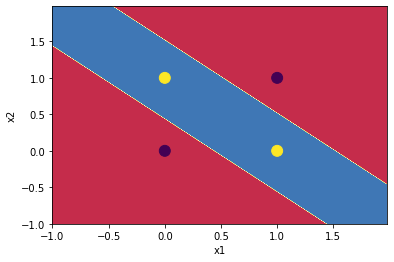

In [ ]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.02
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], marker='o', c = y.T, s=120)

plot_decision_boundary(lambda x: predict(learned_parameters,x.T), X, Y)